TASK 3-CAR PREDICTION WITH MACHINE LEARNING

MANAN GANDHI

In [1]:
import pandas as pd

dataset_path = r"C:\Users\91996\Downloads\car data.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataframe to understand the data
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis

In [3]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
df.shape

(301, 9)

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [10]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Visualizing number of cars based on the transmission and factors such as selling price, Present price and kms

In [11]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['Selling_Price'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[150  91  34   9   6   5   4   0   0   2]
[ 0.1   3.59  7.08 10.57 14.06 17.55 21.04 24.53 28.02 31.51 35.  ]


In [12]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['Present_Price'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[223  58  10   9   0   0   0   0   0   1]
[ 0.32   9.548 18.776 28.004 37.232 46.46  55.688 64.916 74.144 83.372
 92.6  ]


In [13]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['Driven_kms'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[236  57   5   1   1   0   0   0   0   1]
[   500.  50450. 100400. 150350. 200300. 250250. 300200. 350150. 400100.
 450050. 500000.]


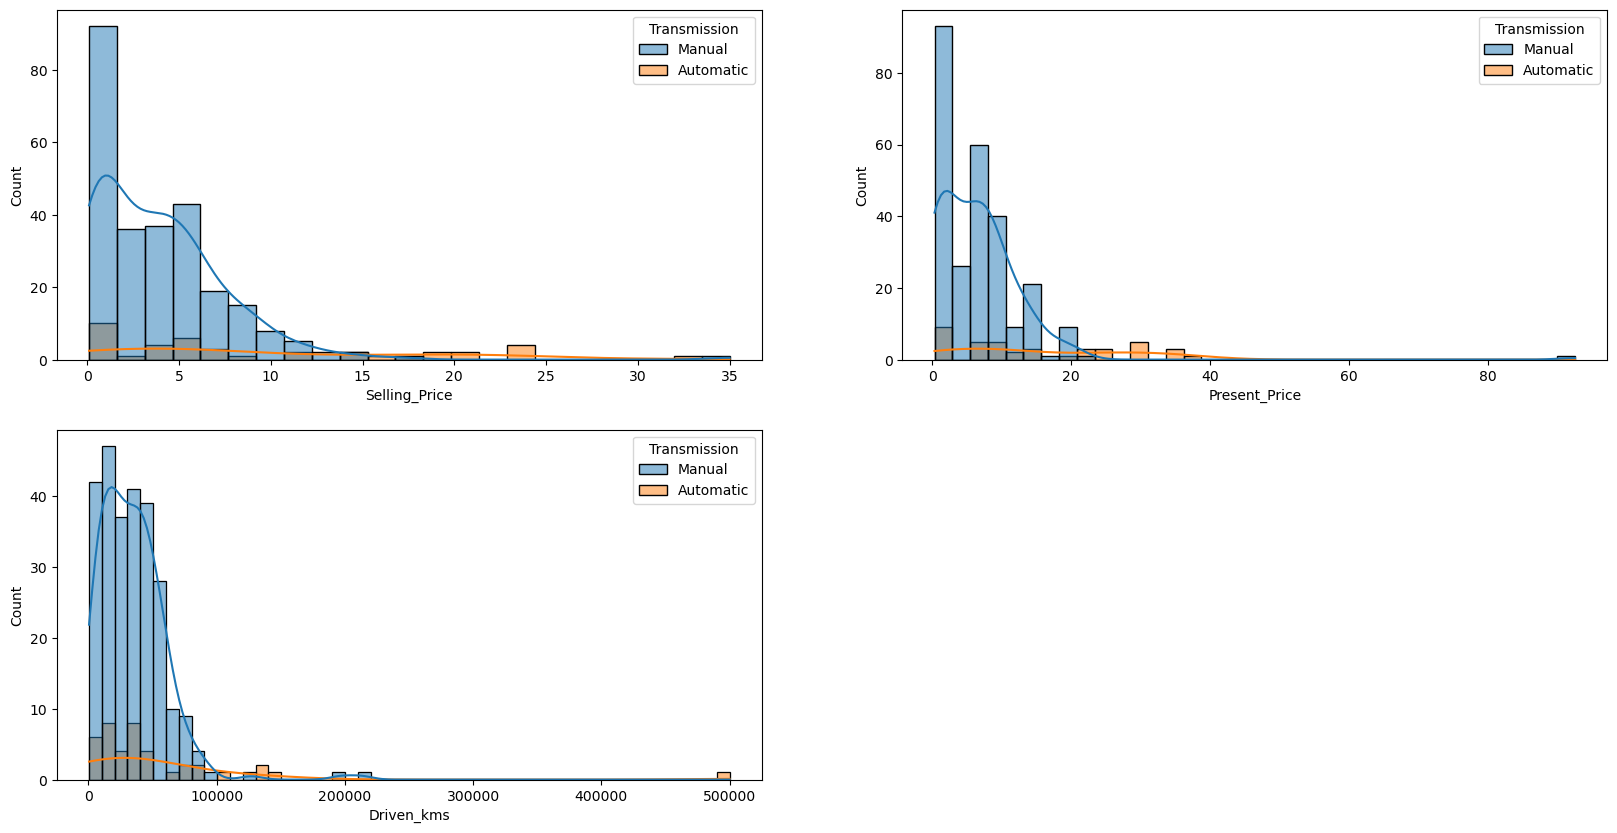

In [14]:
plt.figure(figsize=(20,10))
for i,z in enumerate (['Selling_Price','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=z,kde=True,hue='Transmission',data=df)
plt.show()    

In [15]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

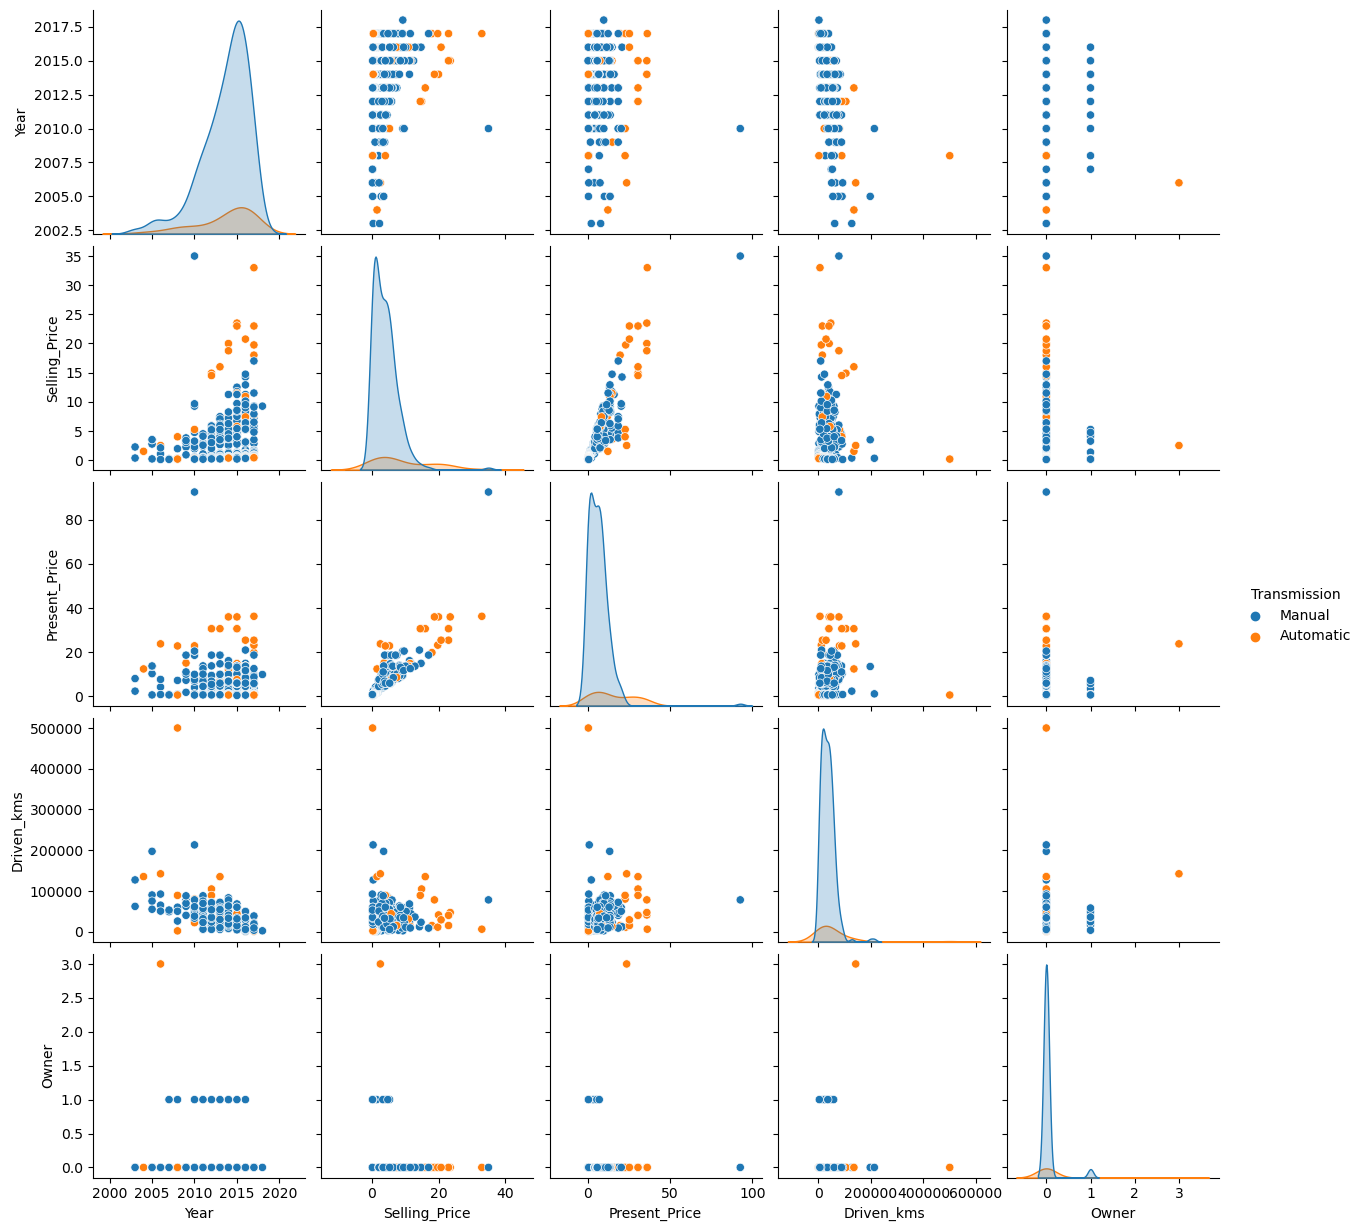

In [16]:
sns.pairplot(data = df , hue = 'Transmission')

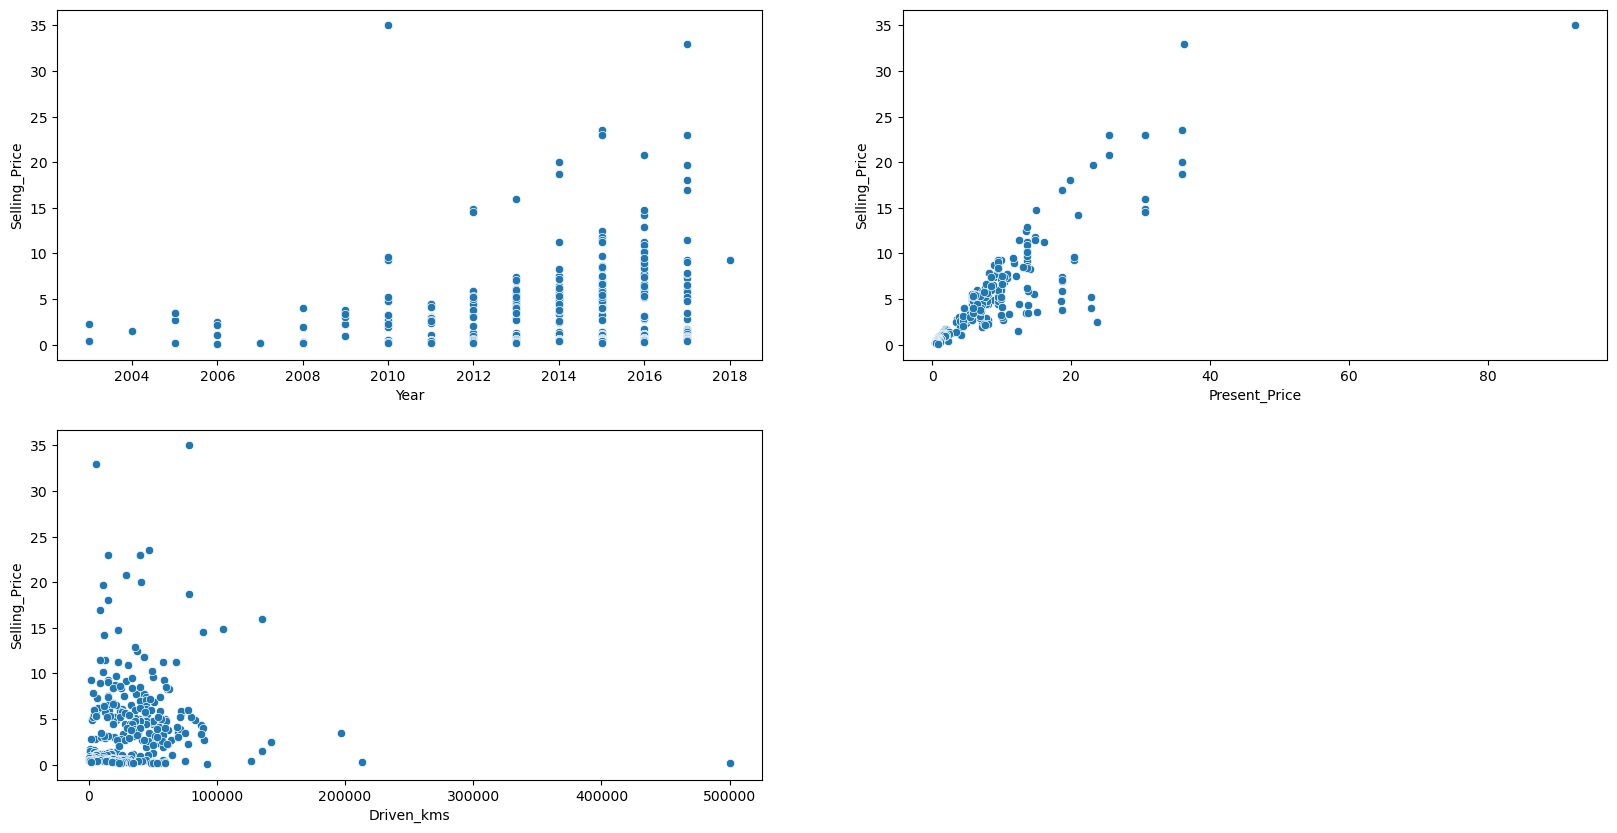

In [17]:
plt.figure(figsize=(20,10))
for i,z in enumerate(['Year','Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data=df,x=z,y='Selling_Price')
plt.show()

Training and Evaluating the ML model

In [19]:
print("Duplicate Entry in data",len(df[df.duplicated()]))

Duplicate Entry in data 2


In [20]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [21]:
df = pd.get_dummies(df, columns=['Car_Name','Fuel_Type','Selling_type','Transmission'])

In [22]:
df.dtypes

Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
                            ...   
Fuel_Type_Petrol             uint8
Selling_type_Dealer          uint8
Selling_type_Individual      uint8
Transmission_Automatic       uint8
Transmission_Manual          uint8
Length: 110, dtype: object

In [23]:
df

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
297,2015,4.00,5.90,60000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [24]:
from sklearn.model_selection import train_test_split


X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 9.298713281868457
R-squared: 0.765640234295705


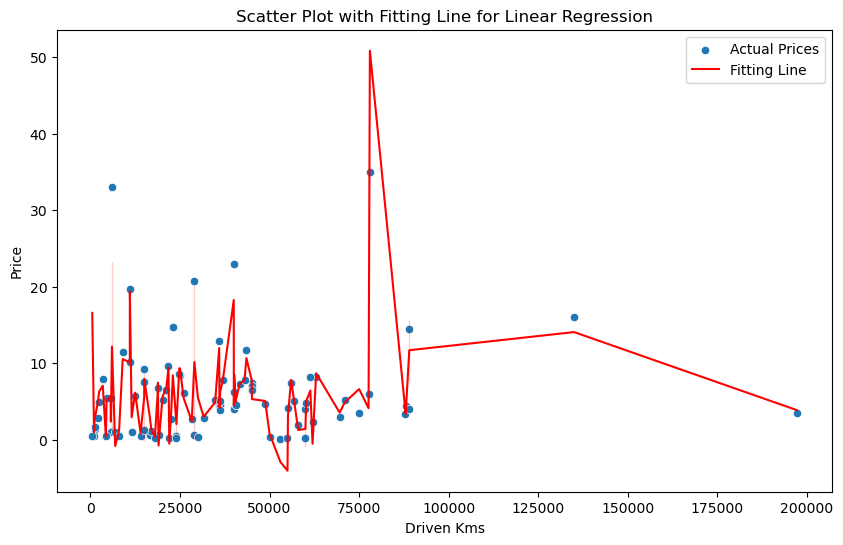

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Driven_kms'], y=y_test, label='Actual Prices')
sns.lineplot(x=X_test['Driven_kms'], y=y_pred, color='red', label='Fitting Line')
plt.title('Scatter Plot with Fitting Line for Linear Regression')
plt.xlabel('Driven Kms')
plt.ylabel('Price')
plt.legend()
plt.show()

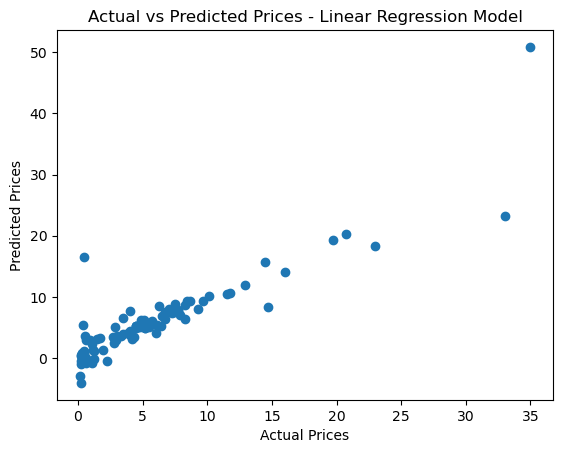

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Linear Regression Model")
plt.show()


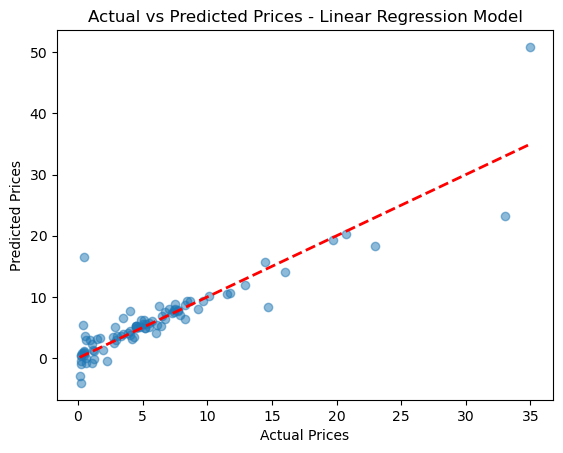

In [29]:
# Plot actual vs predicted prices with fitting line
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices - Linear Regression Model")
plt.show()